In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Apply Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agglom.fit_predict(X_scaled)

In [6]:
# Add the cluster labels to the dataframe for comparison
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Cluster'] = labels
iris_df['True Label'] = y
print(iris_df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   Cluster  True Label  
0        1           0  
1        1           0  
2        1           0  
3        1           0  
4    

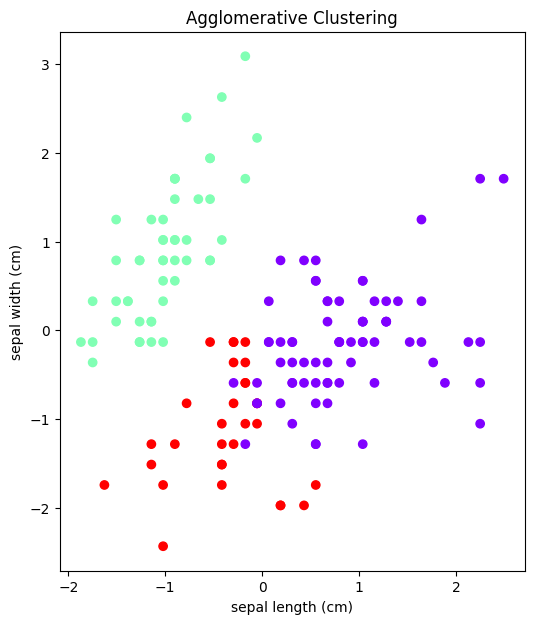

In [9]:
# Scatter plot of the clusters
plt.figure(figsize=(6,7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


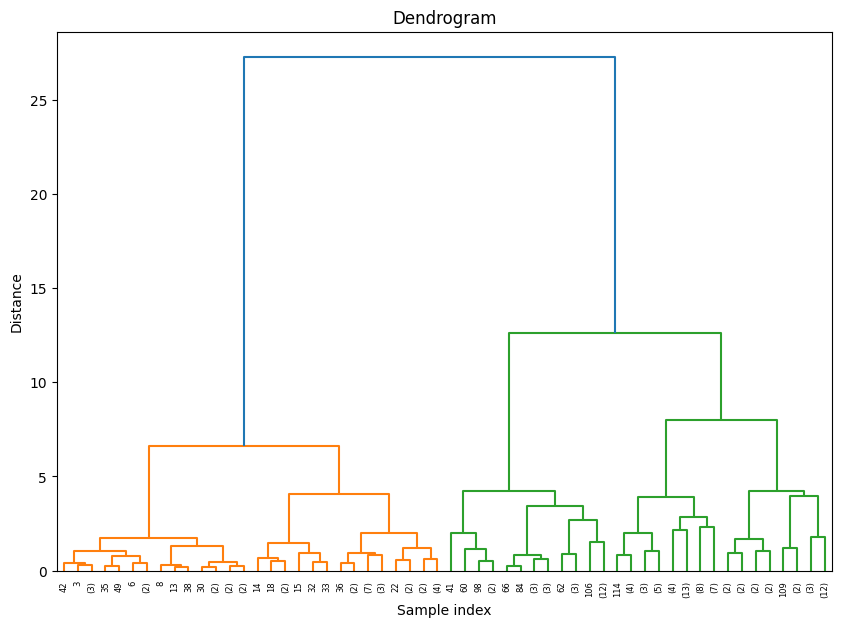

In [8]:

# Dendrogram to visualize the hierarchical clustering
Z = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
